In [ ]:
#загрузка данных 
#отдление бл от 10-сек эпохи
#приведение таблы в должный вид
#расчет lplziv
#нормализация

In [ ]:
# загружаем данные эпохи
#режем как планировали


In [1]:
import mne
import os
import pandas as  pd
import glob

from numpy import *
from numpy.linalg import * 
from scipy import signal
from scipy.signal import hilbert
from scipy.stats import ranksums
from scipy.io import savemat
from scipy.io import loadmat
from random import *
from itertools import combinations
from pylab import *

In [2]:
#functions
def Pre(X):
 '''
 Detrend and normalize input data, X a multidimensional time series
 '''
 X= X.iloc[:,:-1]
 ro,co=shape(X)
 Z=zeros((ro,co))
 for i in range(ro):
  Z[i,:]=signal.detrend(X.iloc[1,:]-mean(X.iloc[1,:]), axis=0)
 return Z
def cpr(string):
 '''
 Lempel-Ziv-Welch compression of binary input string, e.g. string='0010101'. It outputs the size of the dictionary of binary words.
 '''
 d={} 
 w = ''
 i=1
 for c in string: 
  wc = w + c
  if wc in d:
   w = wc
  else:
   d[wc]=wc
   w = c
  i+=1
 return len(d)
def str_col(X):
 '''
 Input: Continuous multidimensional time series
 Output: One string being the binarized input matrix concatenated comlumn-by-column
 '''
 ro,co=shape(X)
 TH=zeros(ro)
 M=zeros((ro,co))
 for i in range(ro):
  M[i,:]=abs(hilbert(X[i,:]))
  TH[i]=mean(M[i,:])

 s=''
 for j in range(co):
  for i in range(ro):
   if M[i,j]>TH[i]:
    s+='1'
   else:
    s+='0'

 return s

def LZc(X):
 '''
 Compute LZc and use shuffled result as normalization
 '''
 X=Pre(X)
 SC=str_col(X)
 M=list(SC)
 shuffle(M)
 w=''
 for i in range(len(M)):
  w+=M[i]
 return cpr(SC)/float(cpr(w))

In [3]:
subjects  = [folder for folder in os.listdir('D:\hse\psychodelic_like_experience\subjects') if os.path.isdir(os.path.join('D:\hse\psychodelic_like_experience\subjects', folder))]
print(subjects)

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\537014862.py:1: SyntaxWarning: invalid escape sequence '\h'
  subjects  = [folder for folder in os.listdir('D:\hse\psychodelic_like_experience\subjects') if os.path.isdir(os.path.join('D:\hse\psychodelic_like_experience\subjects', folder))]
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\537014862.py:1: SyntaxWarning: invalid escape sequence '\h'
  subjects  = [folder for folder in os.listdir('D:\hse\psychodelic_like_experience\subjects') if os.path.isdir(os.path.join('D:\hse\psychodelic_like_experience\subjects', folder))]


['AS32', 'CB55', 'DE21', 'DF23', 'EE89', 'FK11', 'FK24', 'fx48', 'GF87', 'GG88', 'GS21', 'HG11', 'JK67', 'JU77', 'KI09', 'KL72', 'KO33', 'LL90', 'MN99', 'MO45', 'NO21', 'OO11', 'OP01', 'PO67', 'PP00', 'RD56', 'RO88', 'RT12', 'TR90', 'TY65', 'YT50']


In [246]:
subjects  = ['AS32', 'CB55', 'DE21', 'DF23', 'EE89', 'FK11', 'FK24', 'fx48', 'GF87', 'GG88', 'GS21', 'HG11', 'JK67', 'JU77', 'KI09', 'KL72', 'KO33', 'LL90', 'MN99', 'MO45', 'NO21', 'OO11', 'OP01', 'PO67', 'PP00', 'RD56', 'RO88', 'RT12', 'TR90', 'TY65']

In [4]:
sensors =['Fp1', 'Fz', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1',
       'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'Cz',
       'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'Fp2']

In [5]:
len(sensors)

28

In [6]:
import glob
files = glob.glob('D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/*')
print(files)

['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_CubesControl_PurpleGreen_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fracta

In [249]:
subjects

['AS32',
 'CB55',
 'DE21',
 'DF23',
 'EE89',
 'FK11',
 'FK24',
 'fx48',
 'GF87',
 'GG88',
 'GS21',
 'HG11',
 'JK67',
 'JU77',
 'KI09',
 'KL72',
 'KO33',
 'LL90',
 'MN99',
 'MO45',
 'NO21',
 'OO11',
 'OP01',
 'PO67',
 'PP00',
 'RD56',
 'RO88',
 'RT12',
 'TR90',
 'TY65']

In [25]:
epochs = mne.read_epochs(file, proj=True, preload=True, 
                                             verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True)

epochs.info

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FC5, FC1, C3, T7, CP5, CP1, Pz, P3, P7, O1, Oz, ...
 chs: 28 EEG
 custom_ref_applied: False
 dig: 31 items (3 Cardinal, 28 EEG)
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 30.0 Hz
 meas_date: 2023-12-18 18:28:57 UTC
 meas_id: 4 items (dict)
 nchan: 28
 projs: EOG-eeg--0.200-0.200-PCA-01: on, EOG-eeg--0.200-0.200-PCA-02: on
 sfreq: 500.0 Hz
>

In [24]:
fr = 'all'
stims = ['Fractal', 'HoneyComb', 'CubesControl', 'kaleidoscope']
subjects  = [folder for folder in os.listdir('D:\hse\psychodelic_like_experience\subjects') if os.path.isdir(os.path.join('D:\hse\psychodelic_like_experience\subjects', folder))]

complexity_df = pd.DataFrame( columns=['sensor','cond', 'subject', 'complexity'])
for subject in subjects:
        for stim in stims:
            try:
                files = glob.glob(f'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{subject}_{stim}*')
                print(files)
                substim = pd.DataFrame()
                for file in files:
                    epochs = mne.read_epochs(file, proj=True, preload=True, 
                                             verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(0, 20)
                    df =  epochs.filter(l_freq =0, h_freq = 30).to_data_frame(index=["condition", "epoch", "time"])
                    t = df.reset_index()
                    t2 =t.T
                    t2.reset_index()
                    t2.columns = t2.iloc[2].values
                    t2['cond'] = t2.iloc[0].values[0]
                    t3 = t2.drop(['condition', 'epoch', 'time'])
                    X = t3.iloc[0:]
                    substim = pd.concat([substim, X])
                for sensor in sensors:
                    chan = substim.loc[substim.index.isin([f'{sensor}'])]
                    compl = LZc(chan)
                    complexity_df.loc[len(complexity_df)] = [f'{sensor}',f'{stim}', f'{subject}', f'{compl}']

               
                

                


            except (IndexError, NameError, ZeroDivisionError, OSError):
                    print('no epo')
complexity_df.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/complexity/1911_c_ep_{fr}.csv')
complexity_df_bl = pd.DataFrame( columns=['sensor','cond', 'subject', 'complexity'])
for subject in subjects:
        for stim in stims:
            try:
                files = glob.glob(f'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{subject}_{stim}*')
                print(files)
                substim = pd.DataFrame()
                for file in files:
                    epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
                    df =  epochs.filter(l_freq = 0, h_freq = 30).to_data_frame(index=["condition", "epoch", "time"])
                    t = df.reset_index()
                    t2 =t.T
                    t2.reset_index()
                    t2.columns = t2.iloc[2].values
                    t2['cond'] = t2.iloc[0].values[0]
                    t3 = t2.drop(['condition', 'epoch', 'time'])
                    X = t3.iloc[0:]
                    substim = pd.concat([substim, X])
                for sensor in sensors:
                    chan = substim.loc[substim.index.isin([f'{sensor}'])]
                    compl = LZc(chan)
                    complexity_df_bl.loc[len(complexity_df_bl)] = [f'{sensor}',f'{stim}', f'{subject}', f'{compl}']

               
                

                


            except (IndexError, NameError, ZeroDivisionError, OSError):
                    print('no epo')
complexity_df_bl.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/complexity/1911_c_base_{fr}.csv')
#complexity_df['comp_bl'] = complexity_df['complexity'] - complexity_df_bl['complexity']
complexity_base = pd.read_csv(f'D:/hse/psychodelic_like_experience/data_processing/complexity/1911_c_base_{fr}.csv')
complexity_ep = pd.read_csv(f'D:/hse/psychodelic_like_experience/data_processing/complexity/1911_c_ep_{fr}.csv')

complexity_ep['comp_bl'] = complexity_ep['complexity'] - complexity_base['complexity']
complexity_ep = complexity_ep.drop(columns = ['Unnamed: 0', 'complexity'])
complexity_ep.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/complexity/1911_c_baselined_{fr}_20_sec.csv')


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_Fractal_Purple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window wi

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:3: SyntaxWarning: invalid escape sequence '\h'
  subjects  = [folder for folder in os.listdir('D:\hse\psychodelic_like_experience\subjects') if os.path.isdir(os.path.join('D:\hse\psychodelic_like_experience\subjects', folder))]
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:3: SyntaxWarning: invalid escape sequence '\h'
  subjects  = [folder for folder in os.listdir('D:\hse\psychodelic_like_experience\subjects') if os.path.isdir(os.path.join('D:\hse\psychodelic_like_experience\subjects', folder))]
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_HoneyComb_GreenPurple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use i

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Red_epo.fi

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 sam

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not se

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by sub

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 s

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Red_epo.fif ...
    Read a total of 2 project

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 sampl

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.44

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (fir

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
------

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 sampl

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
-------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline corr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices avai

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 pro

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not settin

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by sub

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming wind

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_kaleidoscope_Green_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) metho

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_Fractal_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.44

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (fir

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_PinkBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
----------

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
De

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matchin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.4

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code sho

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filte

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass,

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New co

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should u

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection item

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. Ne

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use ins

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_HoneyComb_GreenPur

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
-----------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use ins

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.44

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection i

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy funct

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass,

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should u

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.44

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projecti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_HoneyComb_GreenOrange_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 3

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cle

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_HoneyComb_OrangePi

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_CubesControl_PinkY

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_kaleid

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_kaleidoscope_Red_e

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
De

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.44

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filte

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Red_epo.fi

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_HoneyComb_BluePi

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samp

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamm

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:13: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use i

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
------------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Purple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenu

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection i

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) metho

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_Fractal_Purple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window wi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_HoneyComb_GreenPurple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Blue_epo.fif

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_HoneyComb_BluePi

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_HoneyComb_OrangePi

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
No

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 proj

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_Fractal_Purple_e

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (fir

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
------

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_Blu

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use in

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband att

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use in

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_exper

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Green_epo.fif ...
    Read a total of 2 proje

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 proj

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming wind

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_HoneyComb_GreenPur

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_kaleidoscope_Green_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) metho

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg =

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Red_epo.fi

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (fir

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_PinkBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
----------

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
De

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_BluePi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass,

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New co

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_Blu

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction ap

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Yellow_epo.fif

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. Ne

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use ins

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
-----------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use ins

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy funct

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection it

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass,

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection it

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 sample

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_HoneyComb_GreenOrange_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not s

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not set

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_Fractal_R

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Red_epo.fif ...
    Read a total of 2 projection i

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
De

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filte

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ... 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.44

C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'E

2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the dat

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\1947326773.py:46: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
------------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Purple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequen

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_BluePi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_HoneyComb_GreenOra

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_HoneyComb_RedBlue_

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff fr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequen

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching even

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) metho

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [252]:
stims = ['Fractal', 'HoneyComb', 'CubesControl', 'kaleidoscope']
subjects  = [folder for folder in os.listdir('D:\hse\psychodelic_like_experience\subjects') if os.path.isdir(os.path.join('D:\hse\psychodelic_like_experience\subjects', folder))]

complexity_df = pd.DataFrame( columns=['sensor','cond', 'subject', 'complexity'])
for subject in subjects:
        for stim in stims:
            try:
                files = glob.glob(f'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{subject}_{stim}*')
                print(files)
                substim = pd.DataFrame()
                for file in files:
                    epochs = mne.read_epochs(file, proj=True, preload=True, 
                                             verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(0, 5)
                    df =  epochs.filter(l_freq = 8, h_freq = 13).to_data_frame(index=["condition", "epoch", "time"])
                    t = df.reset_index()
                    t2 =t.T
                    t2.reset_index()
                    t2.columns = t2.iloc[2].values
                    t2['cond'] = t2.iloc[0].values[0]
                    t3 = t2.drop(['condition', 'epoch', 'time'])
                    X = t3.iloc[0:]
                    substim = pd.concat([substim, X])
                for sensor in sensors:
                    chan = substim.loc[substim.index.isin([f'{sensor}'])]
                    compl = LZc(chan)
                    complexity_df.loc[len(complexity_df)] = [f'{sensor}',f'{stim}', f'{subject}', f'{compl}']

               
                

                


            except (IndexError, NameError, ZeroDivisionError, OSError):
                    print('no epo')
complexity_df.to_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_ep.csv')
complexity_df_bl = pd.DataFrame( columns=['sensor','cond', 'subject', 'complexity'])
for subject in subjects:
        for stim in stims:
            try:
                files = glob.glob(f'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{subject}_{stim}*')
                print(files)
                substim = pd.DataFrame()
                for file in files:
                    epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
                    df =  epochs.filter(l_freq = 8, h_freq = 13).to_data_frame(index=["condition", "epoch", "time"])
                    t = df.reset_index()
                    t2 =t.T
                    t2.reset_index()
                    t2.columns = t2.iloc[2].values
                    t2['cond'] = t2.iloc[0].values[0]
                    t3 = t2.drop(['condition', 'epoch', 'time'])
                    X = t3.iloc[0:]
                    substim = pd.concat([substim, X])
                for sensor in sensors:
                    chan = substim.loc[substim.index.isin([f'{sensor}'])]
                    compl = LZc(chan)
                    complexity_df_bl.loc[len(complexity_df_bl)] = [f'{sensor}',f'{stim}', f'{subject}', f'{compl}']

               
                

                


            except (IndexError, NameError, ZeroDivisionError, OSError):
                    print('no epo')
complexity_df_bl.to_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_base.csv')
#complexity_df['comp_bl'] = complexity_df['complexity'] - complexity_df_bl['complexity']
complexity_base = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_base.csv')
complexity_ep = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_ep.csv')

complexity_ep['comp_bl'] = complexity_ep['complexity'] - complexity_base['complexity']
complexity_ep = complexity_ep.drop(columns = ['Unnamed: 0', 'complexity'])
complexity_ep.to_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/1110_c_baselined_alpha.csv')


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_Fractal_Purple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming w

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:2: SyntaxWarning: invalid escape sequence '\h'
  subjects  = [folder for folder in os.listdir('D:\hse\psychodelic_like_experience\subjects') if os.path.isdir(os.path.join('D:\hse\psychodelic_like_experience\subjects', folder))]
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:2: SyntaxWarning: invalid escape sequence '\h'
  subjects  = [folder for folder in os.listdir('D:\hse\psychodelic_like_experience\subjects') if os.path.isdir(os.path.join('D:\hse\psychodelic_like_experience\subjects', folder))]
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_HoneyComb_GreenPurple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) act

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) acti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_li

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleane

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by sub

- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by sub

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by sub

Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Purple_epo.fif', 'D:/hse/psycho

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by sub

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by sub

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_li

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the da

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subs

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by sub

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
N

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by sub

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by sub

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff fr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_Cu

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_kaleidoscope_Green_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_Fractal_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-p

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_PinkBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) activ

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by sub

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (sub

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by sub

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
-----------------

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored chan

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code sho

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_kaleidoscope_Green_epo.fif ...
    Read a total of 2 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a on

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New co

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_li

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_kaleidoscope_Green_epo.fif ...
    Read a total of 2 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-ee

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_li

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matc

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. Ne

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use ins

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use ins

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy funct

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a on

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
     

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
-----

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ... 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimen

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff freque

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_HoneyComb_GreenOrange_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by sub

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) acti

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms


C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magnitude by subselecting 23/28 of the original channels. If the ignored chan

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the dat

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
----

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
-----------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored chan

No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -500

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by sub

2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by sub

- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_CubesControl_GreenOrange_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by sub

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace di

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True,
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:12: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by sub

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Purple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
De

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a le

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_CubesControl_PurpleGreen_epo.fif ...
    Read a total 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NO

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain de

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_Fractal_Purple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming w

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\AS32_HoneyComb_GreenPurple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 1

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\CB55_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_li

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legac

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_HoneyComb_RedBlue_epo.fif']
R

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/c

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the da

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.0

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DE21_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\DF23_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) activ

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
N

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspac

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\EE89_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
N

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legac

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items act

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK11_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of i

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
     

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
No

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (sub

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\FK24_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\fx48_kaleidoscope_Green_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg =

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of i

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykerne

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_CubesControl_PinkBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GF87_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.2

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
   

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GG88_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code sho

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filte

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\GS21_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a on

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New co

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\HG11_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JK67_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. Ne

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\JU77_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use ins

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
--------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
----

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KI09_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
--------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KL72_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use ins

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_Fractal_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. Ne

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\KO33_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a on

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy functio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\LL90_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching event

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
-----

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (sub

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MN99_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\MO45_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching event

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_HoneyComb_GreenOrange_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\NO21_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OO11_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
N

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\OP01_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
----

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PO67_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
-----------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\PP00_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (f

C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'E

Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RD56_kaleidoscope_Red_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_kaleidoscope_Blue_epo.fif ...
    Read a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\2021163292.py:45: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.read_epochs(file, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 0)
C:\Users\lapoz\AppData\Local\Temp\ipykerne


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Green_epo.fif ...
    Read a total of 2 pro

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_HoneyComb_OrangePink_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff fr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_CubesControl_PinkYellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RO88_kaleidoscope_Purple_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
De

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dime

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\RT12_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should us

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TR90_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items acti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Window

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_BluePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_OrangePink_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_BlueRed_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_GreenOrange_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PinkBlue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\TY65_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (1.650 s)

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter fro

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


no epo
['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Blue_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Green_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_Fractal_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection ite

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_HoneyComb_GreenPurple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_HoneyComb_RedBlue_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_CubesControl_PinkYellow_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_CubesControl_PurpleGreen_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain de

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Purple_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Red_epo.fif', 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs\\YT50_kaleidoscope_Yellow_epo.fif']
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [200]:
complexity_ep

sensor          cond subject   comp_bl
0       Fp1       Fractal    AS32  0.006009
1        Fz       Fractal    AS32  0.007784
2        F3       Fractal    AS32 -0.002594
3        F7       Fractal    AS32 -0.000370
4       FC5       Fractal    AS32  0.006441
...     ...           ...     ...       ...
1914     T8  kaleidoscope    YT50  0.004911
1915    FC6  kaleidoscope    YT50 -0.006547
1916     F4  kaleidoscope    YT50  0.004030
1917     F8  kaleidoscope    YT50  0.000765
1918    Fp2  kaleidoscope    YT50 -0.004022

[1919 rows x 4 columns]

In [174]:
complexity_df[['comp_bl']] = complexity_df['complexity'] - complexity_df_bl['complexity']
complexity_df

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [193]:
complexity_df['complexity'] 

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [192]:
complexity_df_bl['complexity']

0       0.21428571428571427
1       0.21763085399449036
2        0.2206896551724138
3       0.21182943603851445
4        0.2222222222222222
               ...         
1914    0.18672199170124482
1915    0.18153846153846154
1916    0.18575851393188855
1917    0.18055555555555555
1918    0.18302658486707565
Name: complexity, Length: 1919, dtype: object

In [180]:
complexity_df = complexity_df.assign(comp_bl=complexity_df['complexity'] - complexity_df_bl['complexity'])
complexity_df

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [178]:
complexity_df[['complexity']].values

array([['0.21536351165980797'],
       ['0.2219178082191781'],
       ['0.21565934065934067'],
       ...,
       ['0.18493150684931506'],
       ['0.18719211822660098'],
       ['0.1852216748768473']], dtype=object)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [169]:
complexity_ep

Unnamed: 0.1  Unnamed: 0 sensor          cond subject   comp_bl
0                0           0    Fp1       Fractal    AS32 -0.001953
1                1           1     Fz       Fractal    AS32 -0.005424
2                2           2     F3       Fractal    AS32  0.005219
3                3           3     F7       Fractal    AS32  0.005758
4                4           4    FC5       Fractal    AS32  0.005922
...            ...         ...    ...           ...     ...       ...
1863          1863        1863    FC6  kaleidoscope    YT50 -0.000524
1864          1864        1864    FC2  kaleidoscope    YT50 -0.002806
1865          1865        1865     F4  kaleidoscope    YT50 -0.003853
1866          1866        1866     F8  kaleidoscope    YT50 -0.000246
1867          1867        1867    Fp2  kaleidoscope    YT50  0.001576

[1868 rows x 6 columns]

In [147]:
complexity_df.to_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_ep.csv')

In [194]:
complexity_base = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_base.csv')
complexity_ep = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_ep.csv')

complexity_ep['comp_bl'] = complexity_ep['complexity'] - complexity_base['complexity']
complexity_ep = complexity_ep.drop(columns = ['Unnamed: 0', 'complexity'])

In [ ]:
complexity_ep.to_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_baselined_theta.csv')


In [3]:
complexity_ep = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_baselined_alpha.csv')
complexity_ep

Unnamed: 0 sensor          cond subject   comp_bl
0              0    Fp1       Fractal    AS32  0.001957
1              1     Fz       Fractal    AS32  0.003678
2              2     F3       Fractal    AS32 -0.004423
3              3     F7       Fractal    AS32  0.011734
4              4    FC5       Fractal    AS32 -0.003411
...          ...    ...           ...     ...       ...
1863        1863    FC6  kaleidoscope    YT50 -0.000660
1864        1864    FC2  kaleidoscope    YT50  0.002534
1865        1865     F4  kaleidoscope    YT50  0.000109
1866        1866     F8  kaleidoscope    YT50  0.006072
1867        1867    Fp2  kaleidoscope    YT50  0.002937

[1868 rows x 5 columns]

In [157]:
complexity_ep = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_baselined_theta.csv')
complexity_ep

Unnamed: 0.1  Unnamed: 0 sensor          cond subject   comp_bl
0                0           0    Fp1       Fractal    AS32 -0.001953
1                1           1     Fz       Fractal    AS32 -0.005424
2                2           2     F3       Fractal    AS32  0.005219
3                3           3     F7       Fractal    AS32  0.005758
4                4           4    FC5       Fractal    AS32  0.005922
...            ...         ...    ...           ...     ...       ...
1863          1863        1863    FC6  kaleidoscope    YT50 -0.000524
1864          1864        1864    FC2  kaleidoscope    YT50 -0.002806
1865          1865        1865     F4  kaleidoscope    YT50 -0.003853
1866          1866        1866     F8  kaleidoscope    YT50 -0.000246
1867          1867        1867    Fp2  kaleidoscope    YT50  0.001576

[1868 rows x 6 columns]

In [171]:
len(sensors)

28

In [20]:
complexity_base['complexity']

0       0.292582
1       0.260631
2       0.279835
3       0.289835
4       0.284542
          ...   
1914    0.228487
1915    0.239409
1916    0.250248
1917    0.245771
1918    0.233831
Name: complexity, Length: 1919, dtype: float64

In [195]:
complexity_ep['comp_bl'] = complexity_ep['complexity'] - complexity_base['complexity']
complexity_ep = complexity_ep.drop(columns = ['Unnamed: 0', 'complexity'])

In [196]:
complexity_ep

Unnamed: 0 sensor          cond subject  complexity   comp_bl
0              0    Fp1       Fractal    AS32    0.215364  0.001078
1              1     Fz       Fractal    AS32    0.221918  0.004287
2              2     F3       Fractal    AS32    0.215659 -0.005030
3              3     F7       Fractal    AS32    0.222374  0.010544
4              4    FC5       Fractal    AS32    0.216066 -0.006156
...          ...    ...           ...     ...         ...       ...
1914        1914     T8  kaleidoscope    YT50    0.185113 -0.001609
1915        1915    FC6  kaleidoscope    YT50    0.180841 -0.000698
1916        1916     F4  kaleidoscope    YT50    0.184932 -0.000827
1917        1917     F8  kaleidoscope    YT50    0.187192  0.006637
1918        1918    Fp2  kaleidoscope    YT50    0.185222  0.002195

[1919 rows x 6 columns]

In [9]:
complexity_ep = complexity_ep.drop(columns = ['Unnamed: 0', 'complexity'])

KeyError: "['complexity'] not found in axis"

In [316]:
complexity_ep.loc[complexity_ep.cond.isin(['Fractal'])].drop(columns = ['cond', 'subject'])

sensor   comp_bl
0       Fp1  0.001957
1        Fz  0.003678
2        F3 -0.004423
3        F7  0.011734
4       FC5 -0.003411
...     ...       ...
1779    FC6  0.001775
1780    FC2  0.002182
1781     F4  0.003286
1782     F8 -0.000382
1783    Fp2  0.001805

[481 rows x 2 columns]

In [13]:
complexity_ep = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/1911_c_baselined_delta_20_sec.csv')

fr = complexity_ep.loc[complexity_ep.cond.isin(['Fractal'])]
fr = fr.drop(columns = ['cond', 'subject','Unnamed: 0'])
fr = fr.groupby(['sensor'], sort=False).mean()

k = complexity_ep.loc[complexity_ep.cond.isin(['kaleidoscope'])]
k = k.drop(columns = ['cond', 'subject','Unnamed: 0'])
k = k.groupby(['sensor'], sort=False).mean()

c = complexity_ep.loc[complexity_ep.cond.isin(['CubesControl'])]
c = c.drop(columns = ['cond', 'subject','Unnamed: 0'])
c = c.groupby(['sensor'], sort=False).mean()

h = complexity_ep.loc[complexity_ep.cond.isin(['HoneyComb'])]
h = h.drop(columns = ['cond', 'subject','Unnamed: 0'])
h = h.groupby(['sensor'], sort=False).mean()


test = complexity_df = pd.DataFrame( )
test1 = pd.concat([fr, k,c, h], axis =  1)

test1.columns = ['fractal', 'kaleidoscope', 'cubes', 'honey']
test2 =test1.reset_index().drop(columns =['sensor'])

#test2 = test2.to_numpy()

test2['fk'] = test2['fractal'] - test2['kaleidoscope']
test2['hc'] = test2['honey'] - test2['cubes']

test3 = test2[['fk', 'hc']]
test3 = test3.to_numpy()

evoked.data = test3*100

In [ ]:
complexity_ep.to_csv('D:/hse/psychodelic_like_experience/data_processing/complexity/c_baselined_theta.csv')


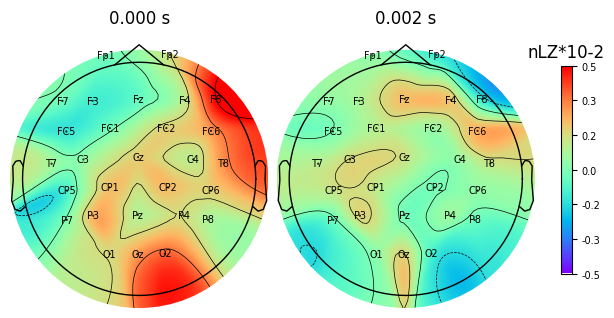

Text(0.5, 0.98, 'nLempel-Ziv complexity (alpha)')

In [14]:
fig = evoked.plot_topomap(times = evoked.times, scalings = 1, ch_type='eeg',size = 2,# mask=bool_array.reshape(28, 2),   mask_params=mask_params,
                              cmap = 'rainbow', sensors=True, show_names=True, units='nLZ*10-2',  show=True)
titles = [ 'Fractal -- kaleidoscope', 'CubesControl -- HoneyComb' ]
for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
fig.suptitle(f"nLempel-Ziv complexity (alpha)",  fontsize=15, fontweight='bold')


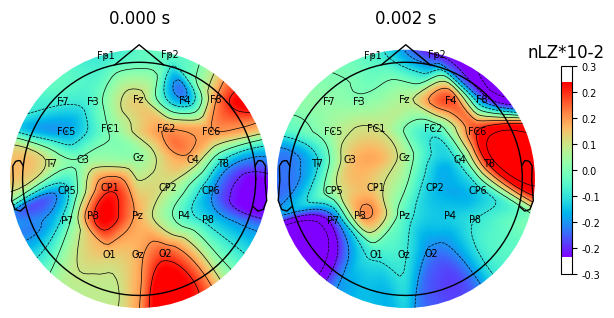

Text(0.5, 0.98, 'nLempel-Ziv complexity (alpha)')

In [155]:
fig = evoked.plot_topomap(times = evoked.times, scalings = 1, ch_type='eeg',size = 2,# mask=bool_array.reshape(28, 2),   mask_params=mask_params,
                              cmap = 'rainbow', sensors=True, show_names=True, units='nLZ*10-2',  show=True)
titles = [ 'Fractal -- kaleidoscope', 'CubesControl -- HoneyComb' ]
for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
fig.suptitle(f"nLempel-Ziv complexity (alpha)",  fontsize=15, fontweight='bold')


In [12]:
test = complexity_df = pd.DataFrame( )
test1 = pd.concat([fr, k,c, h], axis =  1)

In [13]:
test1.columns = ['fractal', 'kaleidoscope', 'cubes', 'honey']
test2 =test1.reset_index().drop(columns =['sensor'])

In [14]:
test2 = test2.to_numpy()

In [9]:
raw = mne.io.read_raw_brainvision("D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr", preload=True)
raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})
raw = raw.rename_channels(mapping = {'FP2' : 'Fp2'})
raw.set_montage(montage='standard_1020')

events = mne.read_events('D:/hse/psychodelic_like_experience/data_processing/events/AS32_eve.txt')
epochs = mne.Epochs(raw, events, tmin=0, tmax=0.006, baseline=None, preload = True)
evoked = epochs.average()
evoked.data.shape

Extracting parameters from D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr...
Setting channel info structure...
Reading 0 ... 802799  =      0.000 ...  1605.598 secs...


C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\803978893.py:2: RuntimeWarning: The unit for channel(s) KGR, pletism has changed from V to NA.
  raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 4 original time points ...
0 bad epochs dropped


(28, 4)

In [207]:
test2

array([[-0.05895669, -0.05869029, -0.05994601, -0.05959145],
       [-0.05903492, -0.05835389, -0.06028422, -0.05813309],
       [-0.05874098, -0.05767473, -0.06002988, -0.0594288 ],
       [-0.05898245, -0.05871981, -0.05932423, -0.05880294],
       [-0.05912353, -0.05813954, -0.05976476, -0.05973563],
       [-0.0588795 , -0.05888888, -0.05970924, -0.05869939],
       [-0.05867649, -0.05912717, -0.06054453, -0.05894943],
       [-0.05756442, -0.05798827, -0.05929086, -0.05841033],
       [-0.058736  , -0.05801137, -0.06095762, -0.05965122],
       [-0.05863226, -0.06065048, -0.06103958, -0.05982106],
       [-0.05866128, -0.05970242, -0.06009866, -0.06025157],
       [-0.0585143 , -0.0606477 , -0.06077102, -0.05918373],
       [-0.05845912, -0.05860999, -0.05981175, -0.06037173],
       [-0.05810669, -0.05978211, -0.05973989, -0.05956332],
       [-0.05736049, -0.05992688, -0.05954285, -0.05810468],
       [-0.05745996, -0.06067771, -0.05903955, -0.05993875],
       [-0.05832222, -0.

In [16]:
evoked.data = test2 *100
evoked.data

array([[-4.57289939e-02,  2.07635353e-02,  1.16271036e-02,
        -3.44348406e-02],
       [ 3.46045500e-02, -6.90961061e-02, -3.17684736e-02,
         2.54412353e-02],
       [-1.29282935e-02,  2.74341839e-02, -6.72943699e-02,
        -5.46241119e-02],
       [-3.57397236e-02,  2.91928653e-02,  5.86694171e-03,
         2.55156516e-02],
       [-2.55600008e-02,  1.17993205e-01, -3.06724992e-02,
         1.46158372e-02],
       [-3.39250423e-02, -3.98217469e-02, -2.38855253e-02,
         5.76825805e-02],
       [-3.22196164e-02, -4.50811619e-02, -6.13836037e-02,
         6.05251813e-02],
       [ 4.43697013e-02, -1.25787054e-02,  1.46030879e-01,
         6.67892167e-02],
       [-8.14716680e-02,  1.00112214e-02, -8.88981151e-02,
        -3.42418266e-02],
       [ 2.68414310e-02, -1.97330799e-01, -1.24174152e-01,
        -2.30107665e-02],
       [ 5.94658237e-02, -8.17118549e-02,  8.24554514e-04,
        -4.13089122e-02],
       [ 2.66920008e-02, -2.11405768e-01, -7.07032340e-02,
      

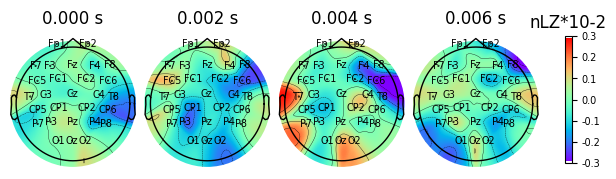

Text(0.5, 0.98, ' nLempel-Ziv complexity (alpha)')

In [17]:
    fig = evoked.plot_topomap(times = evoked.times, scalings = 1, ch_type='eeg', cmap = 'rainbow', sensors=True, show_names=True, units='nLZ*10-2',  show=True)
    titles = [ 'Fractal', 'kaleidoscope', 'CubesControl', 'HoneyComb' ]
    for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
    fig.suptitle(f" nLempel-Ziv complexity (alpha)",  fontsize=15, fontweight='bold')

In [324]:
fig.savefig(f'D:/hse/psychodelic_like_experience/data_processing/pics/lz_complexity_alpha.png')

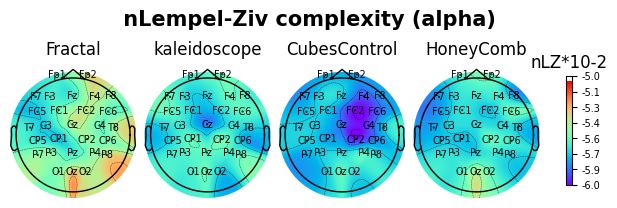

In [75]:
fig

In [ ]:
#diffs

In [12]:
raw = mne.io.read_raw_brainvision("D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr", preload=True)
raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})
raw = raw.rename_channels(mapping = {'FP2' : 'Fp2'})
raw.set_montage(montage='standard_1020')

events = mne.read_events('D:/hse/psychodelic_like_experience/data_processing/events/AS32_eve.txt')
epochs = mne.Epochs(raw, events, tmin=0, tmax=0.002, baseline=None, preload = True)
evoked = epochs.average()
evoked.data.shape

Extracting parameters from D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr...
Setting channel info structure...
Reading 0 ... 802799  =      0.000 ...  1605.598 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 2 original time points ...
0 bad epochs dropped


C:\Users\lapoz\AppData\Local\Temp\ipykernel_9284\4102802181.py:2: RuntimeWarning: The unit for channel(s) KGR, pletism has changed from V to NA.
  raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})


(28, 2)

In [18]:
test1

fractal  kaleidoscope     cubes     honey
sensor                                            
Fp1    -0.000457      0.000208  0.000116 -0.000344
Fz      0.000346     -0.000691 -0.000318  0.000254
F3     -0.000129      0.000274 -0.000673 -0.000546
F7     -0.000357      0.000292  0.000059  0.000255
FC5    -0.000256      0.001180 -0.000307  0.000146
FC1    -0.000339     -0.000398 -0.000239  0.000577
C3     -0.000322     -0.000451 -0.000614  0.000605
T7      0.000444     -0.000126  0.001460  0.000668
CP5    -0.000815      0.000100 -0.000889 -0.000342
CP1     0.000268     -0.001973 -0.001242 -0.000230
Pz      0.000595     -0.000817  0.000008 -0.000413
P3      0.000267     -0.002114 -0.000707  0.000840
P7     -0.000621     -0.000271  0.000884 -0.001024
O1      0.000157     -0.001030 -0.000451 -0.001044
Oz      0.000314     -0.001068  0.001440  0.000741
O2      0.000436     -0.001678  0.001009 -0.000772
P4     -0.001588     -0.001138 -0.000542 -0.001656
P8     -0.001148     -0.000145 -0.000015 -0.000818
CP6    -0.001864     -0.000392  0.000097 -0.000957
CP2    -0.000280     -0.001021  0.000967 -0.000291
Cz     -0.000494     -0.000746 -0.000226  0.000248
C4     -0.000489     -0.001734  0.000563  0.000003
T8     -0.001506     -0.000419 -0.001917  0.000775
FC6    -0.000573     -0.002150 -0.002927 -0.000507
FC2     0.000256     -0.001309 -0.000967 -0.001425
F4     -0.000850      0.000626 -0.002245 -0.000086
F8      0.000040     -0.001500 -0.000571 -0.002378
Fp2     0.000666      0.001001  0.001114 -0.001311

In [19]:
test2 =test1.reset_index().drop(columns =['sensor'])
test2

fractal  kaleidoscope     cubes     honey
0  -0.000457      0.000208  0.000116 -0.000344
1   0.000346     -0.000691 -0.000318  0.000254
2  -0.000129      0.000274 -0.000673 -0.000546
3  -0.000357      0.000292  0.000059  0.000255
4  -0.000256      0.001180 -0.000307  0.000146
5  -0.000339     -0.000398 -0.000239  0.000577
6  -0.000322     -0.000451 -0.000614  0.000605
7   0.000444     -0.000126  0.001460  0.000668
8  -0.000815      0.000100 -0.000889 -0.000342
9   0.000268     -0.001973 -0.001242 -0.000230
10  0.000595     -0.000817  0.000008 -0.000413
11  0.000267     -0.002114 -0.000707  0.000840
12 -0.000621     -0.000271  0.000884 -0.001024
13  0.000157     -0.001030 -0.000451 -0.001044
14  0.000314     -0.001068  0.001440  0.000741
15  0.000436     -0.001678  0.001009 -0.000772
16 -0.001588     -0.001138 -0.000542 -0.001656
17 -0.001148     -0.000145 -0.000015 -0.000818
18 -0.001864     -0.000392  0.000097 -0.000957
19 -0.000280     -0.001021  0.000967 -0.000291
20 -0.000494     -0.000746 -0.000226  0.000248
21 -0.000489     -0.001734  0.000563  0.000003
22 -0.001506     -0.000419 -0.001917  0.000775
23 -0.000573     -0.002150 -0.002927 -0.000507
24  0.000256     -0.001309 -0.000967 -0.001425
25 -0.000850      0.000626 -0.002245 -0.000086
26  0.000040     -0.001500 -0.000571 -0.002378
27  0.000666      0.001001  0.001114 -0.001311

In [20]:
test2['fk'] = test2['fractal'] - test2['kaleidoscope']
test2['hc'] = test2['honey'] - test2['cubes']

In [28]:
test2

fractal  kaleidoscope     cubes     honey        fk        hc
0  -0.000457      0.000208  0.000116 -0.000344 -0.000665 -0.000461
1   0.000346     -0.000691 -0.000318  0.000254  0.001037  0.000572
2  -0.000129      0.000274 -0.000673 -0.000546 -0.000404  0.000127
3  -0.000357      0.000292  0.000059  0.000255 -0.000649  0.000196
4  -0.000256      0.001180 -0.000307  0.000146 -0.001436  0.000453
5  -0.000339     -0.000398 -0.000239  0.000577  0.000059  0.000816
6  -0.000322     -0.000451 -0.000614  0.000605  0.000129  0.001219
7   0.000444     -0.000126  0.001460  0.000668  0.000569 -0.000792
8  -0.000815      0.000100 -0.000889 -0.000342 -0.000915  0.000547
9   0.000268     -0.001973 -0.001242 -0.000230  0.002242  0.001012
10  0.000595     -0.000817  0.000008 -0.000413  0.001412 -0.000421
11  0.000267     -0.002114 -0.000707  0.000840  0.002381  0.001548
12 -0.000621     -0.000271  0.000884 -0.001024 -0.000351 -0.001908
13  0.000157     -0.001030 -0.000451 -0.001044  0.001186 -0.000592
14  0.000314     -0.001068  0.001440  0.000741  0.001382 -0.000699
15  0.000436     -0.001678  0.001009 -0.000772  0.002114 -0.001781
16 -0.001588     -0.001138 -0.000542 -0.001656 -0.000450 -0.001114
17 -0.001148     -0.000145 -0.000015 -0.000818 -0.001003 -0.000803
18 -0.001864     -0.000392  0.000097 -0.000957 -0.001472 -0.001054
19 -0.000280     -0.001021  0.000967 -0.000291  0.000741 -0.001258
20 -0.000494     -0.000746 -0.000226  0.000248  0.000252  0.000474
21 -0.000489     -0.001734  0.000563  0.000003  0.001245 -0.000560
22 -0.001506     -0.000419 -0.001917  0.000775 -0.001087  0.002691
23 -0.000573     -0.002150 -0.002927 -0.000507  0.001577  0.002419
24  0.000256     -0.001309 -0.000967 -0.001425  0.001565 -0.000459
25 -0.000850      0.000626 -0.002245 -0.000086 -0.001476  0.002159
26  0.000040     -0.001500 -0.000571 -0.002378  0.001540 -0.001807
27  0.000666      0.001001  0.001114 -0.001311 -0.000335 -0.002425

In [29]:
test3 = test2[['fk', 'hc']]
test3 = test3.to_numpy()


In [31]:
test3 = test3.to_numpy()


In [30]:
test3

fk        hc
0  -0.000665 -0.000461
1   0.001037  0.000572
2  -0.000404  0.000127
3  -0.000649  0.000196
4  -0.001436  0.000453
5   0.000059  0.000816
6   0.000129  0.001219
7   0.000569 -0.000792
8  -0.000915  0.000547
9   0.002242  0.001012
10  0.001412 -0.000421
11  0.002381  0.001548
12 -0.000351 -0.001908
13  0.001186 -0.000592
14  0.001382 -0.000699
15  0.002114 -0.001781
16 -0.000450 -0.001114
17 -0.001003 -0.000803
18 -0.001472 -0.001054
19  0.000741 -0.001258
20  0.000252  0.000474
21  0.001245 -0.000560
22 -0.001087  0.002691
23  0.001577  0.002419
24  0.001565 -0.000459
25 -0.001476  0.002159
26  0.001540 -0.001807
27 -0.000335 -0.002425

In [32]:
evoked.data = test3*100

In [215]:
raw = mne.io.read_raw_brainvision("D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr", preload=True)
raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})
raw = raw.rename_channels(mapping = {'FP2' : 'Fp2'})
raw.set_montage(montage='standard_1020')

events = mne.read_events('D:/hse/psychodelic_like_experience/data_processing/events/AS32_eve.txt')
epochs = mne.Epochs(raw, events, tmin=0, tmax=0.002, baseline=None, preload = True)
evoked = epochs.average()
evoked.data.shape

Extracting parameters from D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr...
Setting channel info structure...
Reading 0 ... 802799  =      0.000 ...  1605.598 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 2 original time points ...
0 bad epochs dropped


C:\Users\lapoz\AppData\Local\Temp\ipykernel_5620\4102802181.py:2: RuntimeWarning: The unit for channel(s) KGR, pletism has changed from V to NA.
  raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})


(28, 2)

In [216]:
evoked.times

array([0.   , 0.002])

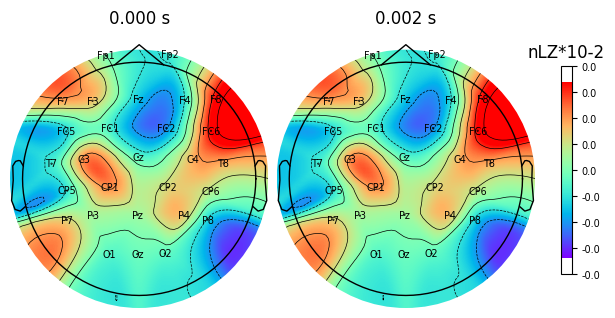

Text(0.5, 0.98, 'nLempel-Ziv complexity (alpha)')

In [217]:
    fig = evoked.plot_topomap(times = evoked.times, scalings = 1, ch_type='eeg',size = 2,# mask=bool_array.reshape(28, 2),   mask_params=mask_params,
                              cmap = 'rainbow', sensors=True, show_names=True, units='nLZ*10-2',  show=True)
    titles = [ 'Fractal -- kaleidoscope', 'CubesControl -- HoneyComb' ]
    for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
    fig.suptitle(f"nLempel-Ziv complexity (alpha)",  fontsize=15, fontweight='bold')

In [332]:
fig.savefig(f'D:/hse/psychodelic_like_experience/data_processing/pics/lz_complexity_diff_no_fdr_alpha.png')

In [15]:
fk = pd.read_csv("D:/hse/psychodelic_like_experience/data_processing/stats/1110_aov_complexity_fk_alpha.csv").pivot_table(index='sensor', columns='rn', values='p_value', aggfunc='first', sort=False).reset_index()
hc = pd.read_csv("D:/hse/psychodelic_like_experience/data_processing/stats/1110_aov_complexity_HCCC_alpha.csv").pivot_table(index='sensor', columns='rn', values='p_value', aggfunc='first', sort=False).reset_index()


KeyError: 'rn'

In [16]:
fk = pd.read_csv("D:/hse/psychodelic_like_experience/data_processing/stats/1110_aov_complexity_fk_alpha.csv").reset_index()
hc = pd.read_csv("D:/hse/psychodelic_like_experience/data_processing/stats/1110_aov_complexity_HCCC_alpha.csv").reset_index()


In [17]:
hc

index  Unnamed: 0     rn        Sum Sq       Mean Sq  NumDF      DenDF  \
0       0           1  hyper  3.621161e-07  3.621161e-07      1  24.562476   
1       1           2  hyper  1.862690e-05  1.862690e-05      1  25.020966   
2       2           3  hyper  3.998298e-05  3.998298e-05      1  25.139216   
3       3           4  hyper  4.887448e-08  4.887448e-08      1  24.741916   
4       4           5  hyper  6.899140e-05  6.899140e-05      1  49.000000   
5       5           6  hyper  2.807896e-07  2.807896e-07      1  24.779311   
6       6           7  hyper  1.441111e-06  1.441111e-06      1  23.756563   
7       7           8  hyper  7.689554e-06  7.689554e-06      1  21.165433   
8       8           9  hyper  4.353473e-05  4.353473e-05      1  43.000000   
9       9          10  hyper  6.059703e-06  6.059703e-06      1  14.334327   
10     10          11  hyper  2.234041e-06  2.234041e-06      1  14.125588   
11     11          12  hyper  1.038400e-05  1.038400e-05      1  15.468037   
12     12          13  hyper  1.143991e-07  1.143991e-07      1  15.886441   
13     13          14  hyper  4.240457e-06  4.240457e-06      1  21.000000   
14     14          15  hyper  4.472876e-05  4.472876e-05      1  21.000000   
15     15          16  hyper  4.161245e-05  4.161245e-05      1  21.000000   
16     16          17  hyper  4.503361e-05  4.503361e-05      1  10.130442   
17     17          18  hyper  3.318366e-07  3.318366e-07      1   6.369267   
18     18          19  hyper  2.286964e-10  2.286964e-10      1   6.440713   
19     19          20  hyper  3.597147e-07  3.597147e-07      1   7.747546   
20     20          21  hyper  1.532260e-05  1.532260e-05      1  15.000000   
21     21          22  hyper  1.238587e-05  1.238587e-05      1   6.012990   
22     22          23  hyper  8.550227e-08  8.550227e-08      1   7.000000   
23     23          24  hyper  1.467585e-05  1.467585e-05      1   7.000000   
24     24          25  hyper  4.402797e-06  4.402797e-06      1   7.000000   
25     25          26  hyper  6.248773e-06  6.248773e-06      1  14.000000   
26     26          27  hyper  1.982691e-07  1.982691e-07      1  14.000000   
27     27          28  hyper  1.398532e-05  1.398532e-05      1   7.000000   

       F value    Pr(>F)   p_value sensor  
0     0.028293  0.867799  0.868000    Fp1  
1     1.997378  0.169892  0.170000     Fz  
2     2.442425  0.130596  0.131000     F3  
3     0.004257  0.948505  0.949000     F7  
4     4.384241  0.041469  0.041500    FC5  
5     0.023467  0.879489  0.879000    FC1  
6     0.071116  0.792021  0.792000     C3  
7     0.927438  0.346404  0.346000     T7  
8     2.652785  0.110674  0.111000    CP5  
9     0.946845  0.346659  0.347000    CP1  
10    0.324007  0.578149  0.578000     Pz  
11    1.416322  0.251956  0.252000     P3  
12    0.012361  0.912866  0.913000     P7  
13    0.205105  0.655276  0.655000     O1  
14    2.166242  0.155899  0.156000     Oz  
15    1.741597  0.201144  0.201000     O2  
16    3.375534  0.095644  0.095600     P4  
17    0.032969  0.861560  0.862000     P8  
18    0.000020  0.996573  0.997000    CP6  
19    0.039645  0.847302  0.847000    CP2  
20    1.500867  0.239428  0.239000     Cz  
21  103.331552  0.000052  0.000052     C4  
22    0.007571  0.933097  0.933000     T8  
23    2.048125  0.195485  0.195000    FC6  
24    0.594380  0.465952  0.466000    FC2  
25    0.480445  0.499559  0.500000     F4  
26    0.012994  0.910865  0.911000     F8  
27    2.147065  0.186264  0.186000    Fp2

In [49]:
def space_fdr(p_val_n):
    #print(p_val_n.shape)
    temp = copy.deepcopy(p_val_n)
    for i in range(temp.shape[1]):
        _, temp[:,i] = mul.fdrcorrection(p_val_n[:,i])
    return temp

In [50]:
from mne.stats import (
    bonferroni_correction,
    fdr_correction,
    permutation_cluster_1samp_test,
    permutation_t_test,
    ttest_1samp_no_p,
)

In [267]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 640.0 kB/s eta 0:00:16
   ---------------------------------------- 0.1/9.8 MB 656.4 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.8 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.8 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.8 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/9.8 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.8 MB 3.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.8 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.8 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 3.6 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/9.8 MB 3.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.2/9.8 MB 3.9 MB/s eta 0:00:02
   ---------- -


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from scipy import stats
import copy
import statsmodels.stats.multitest as mul

In [27]:
frrrs = ['alpha', 'theta', 'delta', 'beta', 'all']

In [222]:
test1

fractal  kaleidoscope     cubes     honey
sensor                                            
Fp1     0.002684      0.000825  0.001673  0.002333
Fz      0.002244      0.000725  0.001838  0.001396
F3      0.001421      0.001438  0.002267  0.000810
F7      0.001199      0.002217  0.000871  0.000565
FC5     0.000920      0.001840  0.001815 -0.000154
FC1     0.003268      0.000327  0.001399  0.001924
C3      0.001392      0.001357  0.001736  0.001351
T7      0.002094      0.000465  0.001746  0.000573
CP5     0.001063      0.002544  0.002438  0.000696
CP1     0.001329      0.003154  0.002170  0.001085
Pz      0.003163      0.002298  0.002154  0.001518
P3      0.003342      0.002813  0.002495  0.001653
P7      0.003782      0.001520  0.002916  0.002055
O1      0.002334      0.002409  0.002821  0.002517
Oz      0.003572      0.002431  0.005407  0.003166
O2      0.002775      0.001365  0.003333  0.001635
P4      0.003831      0.001727  0.001949  0.000667
CP6     0.002010      0.001008  0.001124  0.001624
CP2     0.001908      0.000492  0.001772  0.001372
Cz      0.001920      0.000155  0.001072  0.000138
C4      0.001970      0.000748  0.001689  0.000933
T8      0.001035      0.001411  0.001521  0.002386
FC6     0.002164      0.001528 -0.000752  0.002063
F4      0.002970      0.001725  0.000320  0.002216
F8      0.000862      0.002348 -0.000404  0.000649
Fp2     0.002158      0.001979  0.002379  0.002800

In [242]:
dataset.sensor.values

array(['Fp1', 'Fz', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1',
       'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'Cz',
       'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'Fp2'], dtype=object)

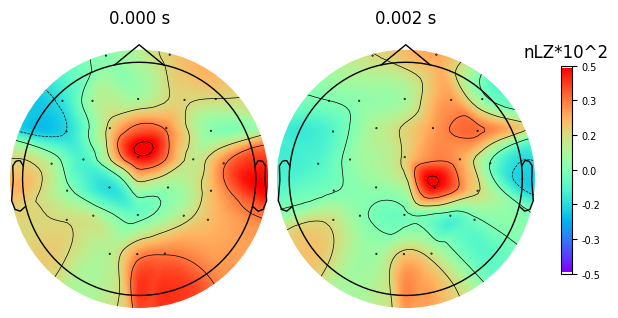

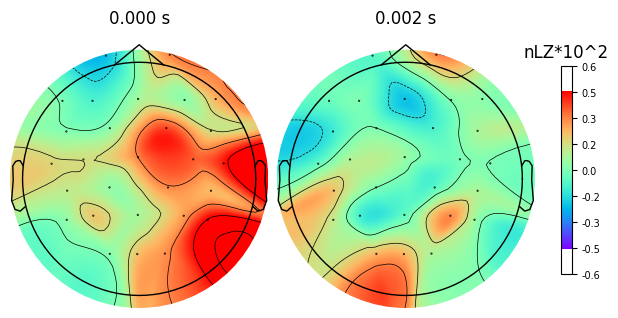

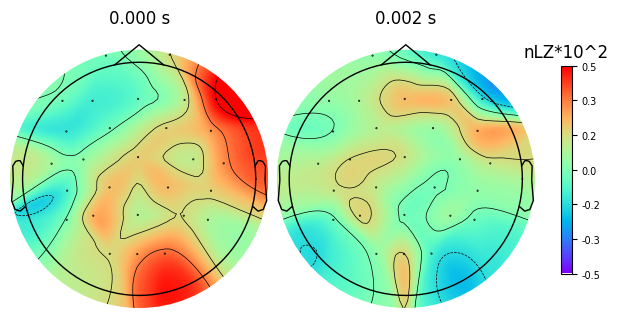

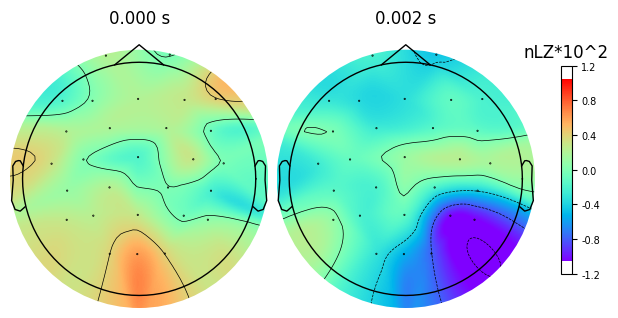

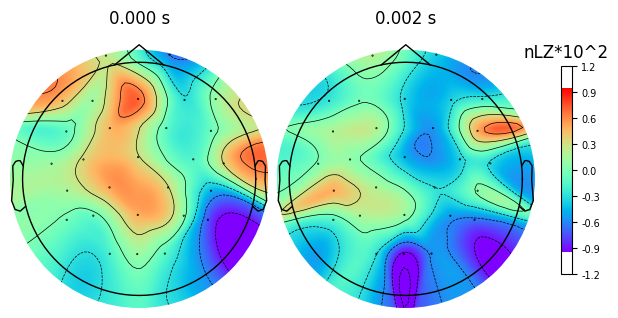

In [87]:
frrrs = ['alpha', 'theta', 'delta', 'beta', 'all']
for frrr in frrrs:
    complexity_ep = pd.read_csv(f'D:/hse/psychodelic_like_experience/data_processing/complexity/1911_c_baselined_{frrr}_20_sec.csv')
    
    fr = complexity_ep.loc[complexity_ep.cond.isin(['Fractal'])]
    fr = fr.drop(columns = ['cond', 'subject','Unnamed: 0'])
    fr = fr.groupby(['sensor'], sort=False).mean()
    
    k = complexity_ep.loc[complexity_ep.cond.isin(['kaleidoscope'])]
    k = k.drop(columns = ['cond', 'subject','Unnamed: 0'])
    k = k.groupby(['sensor'], sort=False).mean()
    
    c = complexity_ep.loc[complexity_ep.cond.isin(['CubesControl'])]
    c = c.drop(columns = ['cond', 'subject','Unnamed: 0'])
    c = c.groupby(['sensor'], sort=False).mean()
    
    h = complexity_ep.loc[complexity_ep.cond.isin(['HoneyComb'])]
    h = h.drop(columns = ['cond', 'subject','Unnamed: 0'])
    h = h.groupby(['sensor'], sort=False).mean()
    
    
    #test = complexity_df = pd.DataFrame( )
    test1 = pd.concat([fr, k,c, h], axis =  1)
    
    test1.columns = ['fractal', 'kaleidoscope', 'cubes', 'honey']
    test2 =test1.reset_index().drop(columns =['sensor'])
    
    #test2 = test2.to_numpy()
    
    test2['fk'] = test2['fractal'] - test2['kaleidoscope']
    test2['hc'] = test2['honey'] - test2['cubes']
    
    test3 = test2[['fk', 'hc']]
    test3 = test3.to_numpy()
    
    evoked.data = test3*100
    
    fk = pd.read_csv(f"D:/hse/psychodelic_like_experience/data_processing/stats/1911_aov_complexity_fk_{frrr}.csv").reset_index()
    hc = pd.read_csv(f"D:/hse/psychodelic_like_experience/data_processing/stats/1911_aov_complexity_HCCC_{frrr}.csv").reset_index()
    
    col2_array = fk['p_value'].values
    col3_array = hc['p_value'].values
    # Stack the arrays vertically to create a single array
    combined_array = np.stack((col2_array, col3_array), axis=1)
    combined_array = space_fdr(combined_array)
    threshold = 0.05
    bool_array = np.array(combined_array) < threshold
    mask_params=dict(marker='o', markerfacecolor='lemonchiffon', markeredgecolor='white', linewidth=0, markersize=14)
    #mask_params=dict(marker=None, markerfacecolor='white', markeredgecolor='white', linewidth=4, markersize=20)
    
    fig = evoked.plot_topomap(times = evoked.times, scalings = 1, ch_type='eeg', mask=bool_array.reshape(28, 2), size = 2,  mask_params=mask_params, cmap = 'rainbow', sensors=True, show_names=True, units='nLZ*10^2',  show=True)
    titles = [ 'Fractal -- kaleidoscope', 'CubesControl -- HoneyComb' ]
    for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
    fig.suptitle(f"nLempel-Ziv complexity ({frrr})",  fontsize=15, fontweight='bold')
    dataset = pd.DataFrame()
    dataset['sensor'] = fk[['sensor']]
    dataset['fdr_fk'] = mul.fdrcorrection(col2_array)[1]
    dataset['fdr_hc'] = mul.fdrcorrection(col3_array)[1]
    fig.savefig(f'D:/hse/psychodelic_like_experience/data_processing/pics/1911_lz_complexity_diff_fdr_{frrr}.png')
    dataset.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/pics/1110_lz_complexity_diff_fdr_{frrr}.csv')
    

In [53]:
from statsmodels.sandbox.stats.multicomp import multipletests


In [73]:
col2_array = np.array(col2_array)
col3_array =np.array(col3_array)

In [75]:
col3_array

array([0.755  , 0.0977 , 0.317  , 0.00927, 0.862  , 0.948  , 0.758  ,
       0.947  , 0.335  , 0.889  , 0.88   , 0.818  , 0.334  , 0.237  ,
       0.00571, 0.0483 , 0.138  , 0.0303 , 0.639  , 0.248  , 0.192  ,
       0.428  , 0.565  , 0.648  , 0.0469 , 0.753  , 0.059  , 0.158  ])

In [71]:
x = np.arange(3, 10, 2)
x

array([3, 5, 7, 9])

In [86]:
multipletests(col2_array, alpha=0.05, 
                    method='bonferroni', is_sorted = False)[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [82]:
combined_array

array([[0.80181818, 0.948     ],
       [0.1592    , 0.3908    ],
       [0.992     , 0.62533333],
       [0.88355556, 0.12978   ],
       [0.992     , 0.948     ],
       [0.1592    , 0.948     ],
       [0.1592    , 0.948     ],
       [0.88355556, 0.948     ],
       [0.80181818, 0.62533333],
       [0.1592    , 0.948     ],
       [0.1592    , 0.948     ],
       [0.992     , 0.948     ],
       [0.992     , 0.62533333],
       [0.992     , 0.57866667],
       [0.992     , 0.12978   ],
       [0.992     , 0.27048   ],
       [0.88355556, 0.483     ],
       [0.24745   , 0.27048   ],
       [0.88355556, 0.948     ],
       [0.1592    , 0.57866667],
       [0.65022222, 0.5376    ],
       [0.992     , 0.749     ],
       [0.88355556, 0.93058824],
       [0.88355556, 0.948     ],
       [0.992     , 0.27048   ],
       [0.88355556, 0.948     ],
       [0.992     , 0.27533333],
       [0.1592    , 0.49155556]])

In [ ]:
fk = pd.read_csv("D:/hse/psychodelic_like_experience/data_processing/stats/1110_aov_complexity_fk_alpha.csv").reset_index()
hc = pd.read_csv("D:/hse/psychodelic_like_experience/data_processing/stats/1110_aov_complexity_HCCC_alpha.csv").reset_index()


In [228]:
evoked.data = test3*100

In [231]:
fig = evoked.plot_topomap()

IndexError: index 26 is out of bounds for axis 0 with size 26

In [230]:
    fig = evoked.plot_topomap(times = evoked.times, scalings = 1, ch_type='eeg', cmap = 'rainbow', sensors=True, show_names=True, units='nLZ*10^2',  show=True)
    titles = [ 'Fractal -- kaleidoscope', 'CubesControl -- HoneyComb' ]
    for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
    fig.suptitle(f"nLempel-Ziv complexity ({frrr})",  fontsize=15, fontweight='bold')


IndexError: index 26 is out of bounds for axis 0 with size 26

In [107]:
from scipy import stats
  
  
  
  


In [140]:
mul.fdrcorrection(col2_array)[1]

array([0.6888    , 0.6888    , 0.90784615, 0.90784615, 0.5824    ,
       0.952     , 0.90778947, 0.90784615, 0.6888    , 0.5824    ,
       0.6888    , 0.5824    , 0.90784615, 0.90784615, 0.6888    ,
       0.5824    , 0.90784615, 0.89075   , 0.6888    , 0.90778947,
       0.93333333, 0.90778947, 0.6888    , 0.6888    , 0.6888    ,
       0.5824    , 0.6888    , 0.90784615])

In [145]:
fk[['sensor']]

sensor
0     Fp1
1      Fz
2      F3
3      F7
4     FC5
5     FC1
6      C3
7      T7
8     CP5
9     CP1
10     Pz
11     P3
12     P7
13     O1
14     Oz
15     O2
16     P4
17     P8
18    CP6
19    CP2
20     Cz
21     C4
22     T8
23    FC6
24    FC2
25     F4
26     F8
27    Fp2

In [146]:
dataset = pd.DataFrame()
dataset['sensor'] = fk[['sensor']]

In [149]:
dataset

sensor    fdr_fk    fdr_hc
0     Fp1  0.688800  0.777000
1      Fz  0.688800  0.680842
2      F3  0.907846  0.973000
3      F7  0.907846  0.973000
4     FC5  0.582400  0.969043
5     FC1  0.952000  0.680842
6      C3  0.907789  0.680842
7      T7  0.907846  0.973000
8     CP5  0.688800  0.680842
9     CP1  0.582400  0.434000
10     Pz  0.688800  0.860000
11     P3  0.582400  0.680842
12     P7  0.907846  0.680842
13     O1  0.907846  0.434000
14     Oz  0.688800  0.973000
15     O2  0.582400  0.680842
16     P4  0.907846  0.680842
17     P8  0.890750  0.680842
18    CP6  0.688800  0.680842
19    CP2  0.907789  0.680842
20     Cz  0.933333  0.973000
21     C4  0.907789  0.680842
22     T8  0.688800  0.680842
23    FC6  0.688800  0.963455
24    FC2  0.688800  0.680842
25     F4  0.582400  0.680842
26     F8  0.688800  0.680842
27    Fp2  0.907846  0.434000

In [148]:
dataset = pd.DataFrame()
dataset['sensor'] = fk[['sensor']]
dataset['fdr_fk'] = mul.fdrcorrection(col2_array)[1]
dataset['fdr_hc'] = mul.fdrcorrection(col3_array)[1]

In [115]:
fk[['sensor']].values

array([['Fp1'],
       ['Fz'],
       ['F3'],
       ['F7'],
       ['FC5'],
       ['FC1'],
       ['C3'],
       ['T7'],
       ['CP5'],
       ['CP1'],
       ['Pz'],
       ['P3'],
       ['P7'],
       ['O1'],
       ['Oz'],
       ['O2'],
       ['P4'],
       ['P8'],
       ['CP6'],
       ['CP2'],
       ['Cz'],
       ['C4'],
       ['T8'],
       ['FC6'],
       ['FC2'],
       ['F4'],
       ['F8'],
       ['Fp2']], dtype=object)

array([[0.6888    , 0.777     , 0.6888    , 0.68084211, 0.90784615,
        0.973     , 0.90784615, 0.973     , 0.5824    , 0.96904348,
        0.952     , 0.68084211, 0.90778947, 0.68084211, 0.90784615,
        0.973     , 0.6888    , 0.68084211, 0.5824    , 0.434     ,
        0.6888    , 0.86      , 0.5824    , 0.68084211, 0.90784615,
        0.68084211, 0.90784615, 0.434     ],
       [0.6888    , 0.973     , 0.5824    , 0.68084211, 0.90784615,
        0.68084211, 0.89075   , 0.68084211, 0.6888    , 0.68084211,
        0.90778947, 0.68084211, 0.93333333, 0.973     , 0.90778947,
        0.68084211, 0.6888    , 0.68084211, 0.6888    , 0.96345455,
        0.6888    , 0.68084211, 0.5824    , 0.68084211, 0.6888    ,
        0.68084211, 0.90784615, 0.434     ]])

In [135]:
combined_array

array([[0.6888    , 0.777     ],
       [0.6888    , 0.68084211],
       [0.90784615, 0.973     ],
       [0.90784615, 0.973     ],
       [0.5824    , 0.96904348],
       [0.952     , 0.68084211],
       [0.90778947, 0.68084211],
       [0.90784615, 0.973     ],
       [0.6888    , 0.68084211],
       [0.5824    , 0.434     ],
       [0.6888    , 0.86      ],
       [0.5824    , 0.68084211],
       [0.90784615, 0.68084211],
       [0.90784615, 0.434     ],
       [0.6888    , 0.973     ],
       [0.5824    , 0.68084211],
       [0.90784615, 0.68084211],
       [0.89075   , 0.68084211],
       [0.6888    , 0.68084211],
       [0.90778947, 0.68084211],
       [0.93333333, 0.973     ],
       [0.90778947, 0.68084211],
       [0.6888    , 0.68084211],
       [0.6888    , 0.96345455],
       [0.6888    , 0.68084211],
       [0.5824    , 0.68084211],
       [0.6888    , 0.68084211],
       [0.90784615, 0.434     ]])

In [101]:
dataset = pd.DataFrame()
dataset['col2_array'] = col2_array
dataset['col3_array'] = col3_array
dataset

col2_array  col3_array
0       0.3430      0.5550
1       0.3420      0.4370
2       0.8190      0.9130
3       0.8430      0.8660
4       0.0721      0.7960
5       0.9520      0.3190
6       0.5560      0.2850
7       0.7970      0.9660
8       0.3160      0.2150
9       0.0876      0.0465
10      0.3270      0.6450
11      0.1010      0.3520
12      0.7290      0.1000
13      0.8220      0.0447
14      0.1820      0.9280
15      0.1040      0.4090
16      0.7270      0.3150
17      0.5090      0.1980
18      0.2480      0.3520
19      0.5910      0.4620
20      0.9000      0.9730
21      0.6160      0.4540
22      0.3100      0.4180
23      0.2040      0.7570
24      0.3550      0.3290
25      0.1040      0.2000
26      0.3690      0.1920
27      0.6750      0.0436

In [102]:
space_fdr(dataset)

AttributeError: 'numpy._ArrayFunctionDispatcher' object has no attribute 'deepcopy'

In [43]:
evoked.data

array([[ 5.34973145e-05,  5.55395508e-05],
       [-1.18271692e-02, -1.18248926e-02],
       [ 1.14990320e-02,  1.15006958e-02],
       [ 1.44190344e-02,  1.44207300e-02],
       [-9.12666870e-03, -9.12458008e-03],
       [-5.77011597e-03, -5.76841553e-03],
       [ 1.73846344e-02,  1.73862153e-02],
       [-6.06288208e-03, -6.06125732e-03],
       [-6.45798706e-03, -6.45675537e-03],
       [ 1.67151863e-02,  1.67181785e-02],
       [ 3.72506470e-03,  3.72706787e-03],
       [ 4.16180786e-03,  4.16380371e-03],
       [ 9.34711548e-03,  9.34891113e-03],
       [-4.15277710e-03, -4.14613037e-03],
       [-1.86490112e-03, -1.85947266e-03],
       [-2.96601440e-03, -2.96357666e-03],
       [ 1.15048108e-02,  1.15065723e-02],
       [-8.94744019e-03, -8.94489502e-03],
       [ 6.57565552e-03,  6.57733398e-03],
       [ 9.53480835e-03,  9.53681885e-03],
       [-3.75799683e-03, -3.75588379e-03],
       [ 1.38343054e-02,  1.38361792e-02],
       [ 1.42167688e-02,  1.42190454e-02],
       [ 2.

In [67]:
    col2_array = fk['p_value'].values
    col3_array = hc['p_value'].values
    # Stack the arrays vertically to create a single array
    combined_array = np.stack((col2_array, col3_array), axis=1)
    #combined_array = space_fdr(combined_array)
    threshold = 0.06
    bool_array = np.array(combined_array) < threshold
    mask_params=dict(marker='o', markerfacecolor='orange', markeredgecolor='black', linewidth=0, markersize=16)

In [45]:
bool_array

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

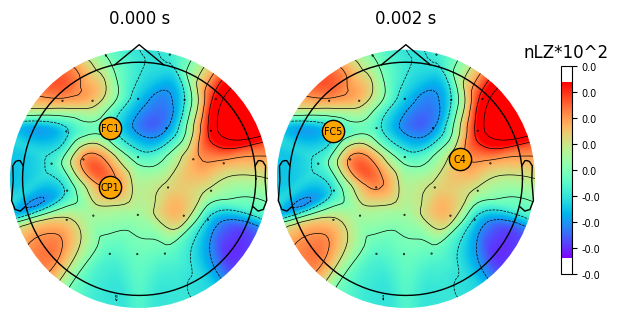

Text(0.5, 0.98, 'nLempel-Ziv complexity (alpha)')

In [68]:
    fig = evoked.plot_topomap(times = evoked.times, scalings = 1, ch_type='eeg', mask=bool_array.reshape(28, 2), size = 2,  mask_params=mask_params, cmap = 'rainbow', sensors=True, show_names=True, units='nLZ*10^2',  show=True)
    titles = [ 'Fractal -- kaleidoscope', 'CubesControl -- HoneyComb' ]
    for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
    fig.suptitle(f"nLempel-Ziv complexity (alpha)",  fontsize=15, fontweight='bold')

In [336]:
fig.savefig(f'D:/hse/psychodelic_like_experience/data_processing/pics/lz_complexity_diff_no_fdr_alpha.png')

In [42]:
complexity_ep

sensor          cond subject   comp_bl
0       Fp1       Fractal    AS32 -0.020858
1        Fz       Fractal    AS32  0.010462
2        F3       Fractal    AS32  0.042524
3        F7       Fractal    AS32  0.037538
4       FC5       Fractal    AS32  0.025992
...     ...           ...     ...       ...
1914     T8  kaleidoscope    YT50  0.017351
1915    FC6  kaleidoscope    YT50  0.002986
1916     F4  kaleidoscope    YT50  0.008101
1917     F8  kaleidoscope    YT50  0.020176
1918    Fp2  kaleidoscope    YT50  0.006837

[1919 rows x 4 columns]

In [294]:
try:
    for subject in subjects:
        for stim in stims:
            files = glob.glob(f'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{subject}_{stim}*')
            substim = pd.DataFrame()
            for file in files:
print
               
                

                


except (IndexError, NameError):
    print('no epo')

IndentationError: expected an indented block after 'for' statement on line 6 (1979578039.py, line 7)

In [291]:
complexity_df

sensor     cond subject           complexity
0     Fp1  Fractal    AS32   0.2653846153846154
1      Fz  Fractal    AS32  0.23243243243243245
2      F3  Fractal    AS32   0.2632794457274827
3      F7  Fractal    AS32  0.28715953307392994
4     FC5  Fractal    AS32  0.28225175918686474
5     FC1  Fractal    AS32  0.24322230828814873
6      C3  Fractal    AS32  0.26120556414219476
7      T7  Fractal    AS32  0.28805620608899296
8     CP5  Fractal    AS32   0.2711864406779661
9     CP1  Fractal    AS32  0.25096525096525096
10     Pz  Fractal    AS32  0.24980784012298232
11     P3  Fractal    AS32   0.2482705611068409
12     P7  Fractal    AS32   0.2690824980724749
13     O1  Fractal    AS32  0.25806451612903225
14     Oz  Fractal    AS32   0.2553846153846154
15     O2  Fractal    AS32  0.25561580170410536
16     P4  Fractal    AS32  0.24307692307692308
17    CP6  Fractal    AS32   0.2494208494208494
18    CP2  Fractal    AS32  0.23996913580246915
19     Cz  Fractal    AS32  0.24249422632794457
20     C4  Fractal    AS32    0.235929067077872
21     T8  Fractal    AS32   0.2846153846153846
22    FC6  Fractal    AS32  0.29024767801857587
23     F4  Fractal    AS32   0.2749806351665376
24     F8  Fractal    AS32   0.2402135231316726
25    Fp2  Fractal    AS32  0.30340557275541796

In [285]:
LZc(chan)

IndexError: single positional indexer is out-of-bounds

In [256]:
complexity_df = pd.DataFrame( columns=['sensor','cond', 'subject', 'complexity'])
complexity_df['sensor'] == '1'
complexity_df['cond'] == '2'
complexity_df['subject'] == '3'
complexity_df['complexity'] == '4'
complexity_df

Empty DataFrame
Columns: [sensor, cond, subject, complexity]
Index: []

In [276]:
len(complexity_df)

19

In [277]:
complexity_df.loc[len(complexity_df)] = ['1','1','2','1']
complexity_df

sensor cond subject complexity
0       1    1       1          1
1       1    1       1          1
2       1    1       1          1
3       1    1       1          1
4       1    1       1          1
5       1    1       1          1
6       1    1       1          1
7       1    1       1          1
8       1    1       1          1
9       1    1       1          1
10      1    1       1          1
11      1    1       1          1
12      1    1       1          1
13      1    1       1          1
14      1    1       1          1
15      1    1       1          1
16      1    1       1          1
17      1    1       1          1
18      1    1       1          1
19      1    1       2          1

In [237]:
X.iloc[X['channel']]
#X.iloc[X['channel'].isin('Fp2')]

KeyError: 'channel'

In [187]:
for file in files:
    
    fname = 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/AS32_CubesControl_PinkBlue_epo.fif'
    epochs = mne.read_epochs(fname, proj=True, preload=True, verbose=None).set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'}).pick_types(eeg = True).crop(-5, 5)
    df =  epochs.to_data_frame(index=["condition", "epoch", "time"])
    t = df.reset_index()
    t2 =t.T
    t2.reset_index()
    t2.columns = t2.iloc[2].values
    t2['cond'] = t2.iloc[0].values[0]
    t3 = t2.drop(['condition', 'epoch', 'time'])
    X = t3.iloc[0:]
    X
    #df.stack().reset_index().sort_values(['channel', 'time'])

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


-5.0     -4.998     -4.996     -4.994     -4.992      -4.99  \
channel                                                                     
Fp1       9.163833   9.838173  10.797245  12.012082  13.424225  14.952485   
Fz       -9.308781 -10.011527 -10.691994 -11.349168 -11.991606 -12.634481   
F3      -10.703822 -10.618366 -10.442856 -10.227172  -10.02913  -9.904706   
F7        1.740904   0.589254  -0.552407  -1.588638  -2.424339  -2.979286   
FC5      -6.567466  -6.932061  -7.324822  -7.719756  -8.091447  -8.413672   
FC1     -12.830054 -13.171269 -13.569078 -14.048253 -14.633301  -15.34002   
C3       -9.963979 -10.808019 -11.807861 -12.956089 -14.234218 -15.606944   
T7       -2.260025  -2.032461  -1.869405  -1.795517  -1.833876  -2.004353   
CP5      -5.813969   -6.55337  -7.324395  -8.108693    -8.8977    -9.6901   
CP1      -8.450883  -8.954557  -9.527766 -10.196293 -10.986576 -11.916422   
Pz       -5.162638  -6.173278  -7.320494  -8.587985  -9.954599 -11.390889   
P3       -6.720458  -7.338222  -8.053155  -8.865579  -9.778122 -10.788979   
P7       -5.491105  -5.889979  -6.370914  -6.933048  -7.580147  -8.315854   
O1        1.737362   1.196969   0.422744  -0.564582  -1.738185  -3.060039   
Oz        9.737675   8.895382   7.620597    5.97226   4.028127   1.884995   
O2       15.184653  14.026054  12.329158  10.201124   7.768937   5.174865   
P4        1.297493  -0.003371  -1.478453  -3.063367   -4.69554  -6.313941   
CP6      -1.009338   -2.31647  -3.767027  -5.298184  -6.846542  -8.350778   
CP2      -6.448973  -7.532338  -8.681892  -9.863678 -11.046732 -12.202724   
Cz       -9.859985 -10.884909 -11.872972 -12.799777  -13.65542 -14.440938   
C4      -11.627412 -12.978829 -14.219989 -15.310703 -16.225964 -16.956177   
T8       -1.904295  -3.115514  -4.368768  -5.563047  -6.614547  -7.466022   
FC6     -10.451556 -11.448347 -12.239641 -12.823425 -13.225081 -13.492034   
F4       -13.16043 -15.141451 -16.872968 -18.259129 -19.245583 -19.827035   
F8       -8.173805  -8.931366  -9.476405  -9.794332  -9.899503  -9.824873   
Fp2      14.693252  16.801257  18.464161  19.628351  20.310441  20.584759   

            -4.988     -4.986     -4.984     -4.982  ...      4.984  \
channel                                              ...              
Fp1      16.495612   17.94397  19.192326  20.148887  ...   6.732806   
Fz      -13.293283 -13.980747 -14.703213 -15.454743  ...  -8.026759   
F3        -9.89952 -10.045805 -10.356537 -10.822131  ...  -3.200217   
F7       -3.196128  -3.046183  -2.522933  -1.658358  ...   1.598119   
FC5      -8.659105  -8.806508  -8.848019  -8.773731  ...  -4.184959   
FC1     -16.168055 -17.099701 -18.100633 -19.116316  ...  -8.341962   
C3      -17.016526 -18.389248 -19.645089 -20.697069  ...  -6.390852   
T7       -2.326076  -2.809548  -3.455738  -4.257933  ...  -0.925459   
CP5     -10.482644 -11.267261 -12.031035 -12.749975  ...  -2.680312   
CP1     -12.985457 -14.170473 -15.425907 -16.681714  ... -10.060045   
Pz      -12.854666 -14.291183 -15.637592  -16.82547  ...  -9.205441   
P3      -11.883816  -13.03135  -14.18476 -15.279807  ...  -3.544299   
P7       -9.136919 -10.027198 -10.957002 -11.882509  ...   2.874932   
O1       -4.478095   -5.92489  -7.322748  -8.588957  ...   4.339153   
Oz       -0.343376  -2.531585   -4.55448  -6.297164  ...   2.277588   
O2        2.570288   0.106493  -2.081866  -3.885614  ...   4.914712   
P4       -7.858042  -9.269196 -10.496987 -11.500431  ...   1.498649   
CP6      -9.751577 -10.993642 -12.032608 -12.836323  ...   2.354747   
CP2     -13.302007 -14.312619 -15.203153 -15.941767  ...  -8.216243   
Cz      -15.161333 -15.820522 -16.418115 -16.943879  ... -15.122552   
C4       -17.50188  -17.86953 -18.070321 -18.117702  ...   -2.21989   
T8       -8.089432  -8.487041  -8.693732   -8.76566  ...  -0.592829   
FC6      -13.67846 -13.840659  -14.01975 -14.237932  ...  -2.604223   
F4      -20.038917 -19.950154 -19.650226 -19.232883  ...  -6.960674   
F8       -9

In [ ]:
'''
sensor | cond| subject| complexity
'''


In [184]:
t = df.reset_index()
t2 =t.T
t2.reset_index()
t2.columns = t2.iloc[2].values
t2['cond'] = t2.iloc[0].values[0]
t3 = t2.drop(['condition', 'epoch', 'time'])
X = t3.iloc[0:]


In [215]:
t.columns

Index(['condition', 'epoch', 'time', 'Fp1', 'Fz', 'F3', 'F7', 'FC5', 'FC1',
       'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4',
       'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FC6', 'F4', 'F8', 'Fp2'],
      dtype='object', name='channel')

In [210]:
t2.iloc[].values

SyntaxError: invalid syntax (1373061305.py, line 1)

In [35]:
test = df.T.reset_index()

In [63]:
test = df.T.reset_index()

In [149]:
def Pre(X):
 '''
 Detrend and normalize input data, X a multidimensional time series
 '''
 X= X.iloc[:,:-1]
 ro,co=shape(X)
 Z=zeros((ro,co))
 for i in range(ro):
  Z[i,:]=signal.detrend(X.iloc[1,:]-mean(X.iloc[1,:]), axis=0)
 return Z


In [181]:
def cpr(string):
 '''
 Lempel-Ziv-Welch compression of binary input string, e.g. string='0010101'. It outputs the size of the dictionary of binary words.
 '''
 d={} 
 w = ''
 i=1
 for c in string: 
  wc = w + c
  if wc in d:
   w = wc
  else:
   d[wc]=wc
   w = c
  i+=1
 return len(d)


In [153]:
X1 = Pre(X)

In [156]:
def str_col(X):
 '''
 Input: Continuous multidimensional time series
 Output: One string being the binarized input matrix concatenated comlumn-by-column
 '''
 ro,co=shape(X)
 TH=zeros(ro)
 M=zeros((ro,co))
 for i in range(ro):
  M[i,:]=abs(hilbert(X[i,:]))
  TH[i]=mean(M[i,:])

 s=''
 for j in range(co):
  for i in range(ro):
   if M[i,j]>TH[i]:
    s+='1'
   else:
    s+='0'

 return s

In [182]:
def LZc(X):
 '''
 Compute LZc and use shuffled result as normalization
 '''
 X=Pre(X)
 SC=str_col(X)
 M=list(SC)
 shuffle(M)
 w=''
 for i in range(len(M)):
  w+=M[i]
 return cpr(SC)/float(cpr(w))

In [167]:
 X=Pre(X)
 SC=str_col(X)
 M=list(SC)
 shuffle(M)


In [188]:
LZc(X)

0.06857624262847514

In [178]:
cpr(SC)

814

In [180]:
float(cpr(w))

NameError: name 'w' is not defined

In [151]:
def cpr(string):
 '''
 Lempel-Ziv-Welch compression of binary input string, e.g. string='0010101'. It outputs the size of the dictionary of binary words.
 '''
 d={} 
 w = ''
 i=1
 for c in string: 
  wc = w + c
  if wc in d:
   w = wc
  else:
   d[wc]=wc
   w = c
  i+=1
 return len(d)

In [166]:
X = t3.iloc[0:]
X.shape

(26, 5002)

In [136]:
 ro,co=shape(X)
 Z=zeros((ro,co))

In [144]:
mean(X.iloc[1,:-1])

0.15719178685900126

In [145]:
 for i in range(ro):
  Z[i,:]=signal.detrend(X.iloc[1,:-1]-mean(X.iloc[1,:-1]), axis=0)


ValueError: could not broadcast input array from shape (5001,) into shape (5002,)

In [ ]:
test['cond'] = 

In [ ]:
for subj in subjects:
    raw = mne.io.read_raw_brainvision(f"D:/hse/psychodelic_like_experience/subjects/{subj}/{subj}.vhdr", preload=True)
    raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})
    #raw.pick_types(stim=True, misc=True)
    events = mne.read_events(f'D:/hse/psychodelic_like_experience/data_processing/events/{subj}_eve.txt')
    data = raw['pletism'][0].reshape(raw['pletism'][0].shape[1],)
    event_conditions = []
    for i in range(0, len(events)):
     label = str(events[:,2][i])[0]
     event_conditions.append(label)
    event_conditions = np.array(event_conditions)
    event_onsets = events[:,0]
    event_labels= events[:,2]
    ppg, info = nk.ppg_process(data, sampling_rate=500)
    mark_array = raw.copy().pick('mark').get_data().flatten()
    events_nk = nk.events_create(event_onsets = event_onsets,
                                 event_durations = event_onsets*0,
                              event_labels= event_labels,
                              event_conditions=event_conditions)
    epochs = nk.epochs_create(ppg, events=events_nk,
                              epochs_start=-10, epochs_end=60, sampling_rate = 500)
    
    
    df = nk.ppg_eventrelated(epochs)
    df.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/pletism_base/{subj}.csv', index=False)